In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get a list of all CSV files in the current directory
csv_files = [file for file in os.listdir('.') if file.endswith(".csv")] 


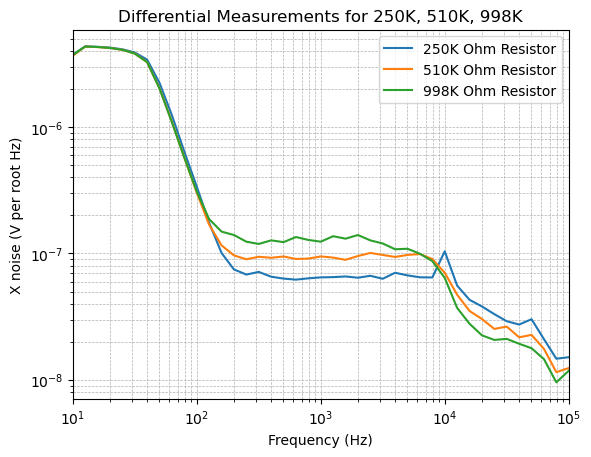

In [14]:
# Directly use the file name, as the files are in the current directory

avg_values = []
error = []

labels = ['250K Ohm Resistor','510K Ohm Resistor','998K Ohm Resistor']
i = 0

# Loop through each CSV file and plot the data
for file in csv_files:
    # Directly use the file name
    df = pd.read_csv(file)
    x_values = df['Frequency (Hz) - Plot 0']
    y_values = df['X noise (V per root Hz) - Plot 0']

    avg_values.append(np.mean(y_values[12:24]))
    error.append(np.std(y_values[12:24]))

    plt.loglog(x_values, y_values, label=labels[i])
    i += 1

plt.xlabel('Frequency (Hz)')
plt.ylabel('X noise (V per root Hz)')
plt.title('Differential Measurements for 250K, 510K, 998K')

plt.legend()

# Set log scale for grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xscale('log')
plt.yscale('log')

plt.xlim(10, 100000)
plt.show()
    

In [9]:
avg_values = np.array(avg_values)
avg_values = np.sort(avg_values)

resistances = [250*10**3,510*10**3,998*10**3]

print(error)

[1.0217587642013268e-08, 6.773334153543258e-09, 8.499591493451647e-09]


Slope of the line: 1.6732266691168305e-20


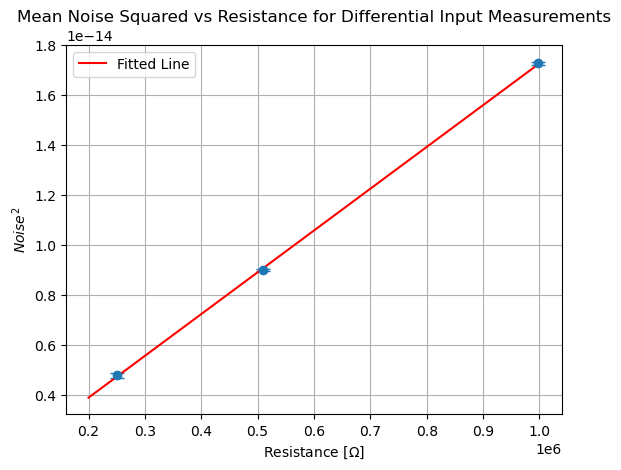

In [10]:
avg_squared = avg_values**2

# Fit a linear regression line (1st-degree polynomial)
coefficients = np.polyfit(resistances, avg_squared, 1)

# The first coefficient represents the slope of the line
slope = coefficients[0]

print("Slope of the line:", slope)

x = np.linspace(200*10**3,1000*10**3)
# Generate predicted values for the fitted line
predicted_y = np.polyval(coefficients, x)

# Plot the data points and the fitted line

plt.errorbar(resistances, avg_squared, yerr=np.power(error,2), fmt='o', capsize=5)
plt.plot(x, predicted_y, label='Fitted Line', color='red')
plt.xlabel('Resistance [$\Omega$]')
plt.ylabel('$Noise^2$')
plt.legend()
plt.grid(True)
plt.title('Mean Noise Squared vs Resistance for Differential Input Measurements')
plt.show()

In [20]:
deviations

array([2.55539561e-08, 2.55539561e-08, 2.55539561e-08])

In [14]:
four_k_t_measured = slope
four_k_t_actual = 4*1.38*10**-23*295.5

percent_error = np.abs((four_k_t_measured - four_k_t_actual) / four_k_t_actual) * 100
print(percent_error)

1.6990631436276775
